In [0]:
# Load libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 5)

In [0]:
df = pd.read_csv('Sonar Mines vs Rocks/Dataset/sonar.all-data', header=None)

In [8]:
# shape

print(df.shape)

(208, 61)


In [14]:
# types

print(df.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
dtype: object


In [26]:
# head

print(df.head(20))

        0       1       2       3       4       5       6       7       8       9   ...      51      52      53      54      55      56      57      58      59  60
0   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  0.0090  0.0032   R
1   0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049  0.0052  0.0044   R
2   0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164  0.0095  0.0078   R
3   0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044  0.0040  0.0117   R
4   0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048  0.0107  0.0094   R
5   0.0286  0.04

In [27]:
# descriptions

print(df.describe())

              0          1          2          3          4          5          6          7          8          9   ...         50         51         52         53         54         55         56         57         58         59
count  208.00000  208.00000  208.00000  208.00000  208.00000  208.00000  208.00000  208.00000  208.00000  208.00000  ...  208.00000  208.00000  208.00000  208.00000  208.00000  208.00000  208.00000  208.00000  208.00000  208.00000
mean     0.02916    0.03844    0.04383    0.05389    0.07520    0.10457    0.12175    0.13480    0.17800    0.20826  ...    0.01607    0.01342    0.01071    0.01094    0.00929    0.00822    0.00782    0.00795    0.00794    0.00651
std      0.02299    0.03296    0.03843    0.04653    0.05555    0.05911    0.06179    0.08515    0.11839    0.13442  ...    0.01201    0.00963    0.00706    0.00730    0.00709    0.00574    0.00579    0.00647    0.00618    0.00503
min      0.00150    0.00060    0.00150    0.00580    0.00670    0.01020    0

In [28]:
# class distribution

print(df.groupby(60).size())

60
M    111
R     97
dtype: int64


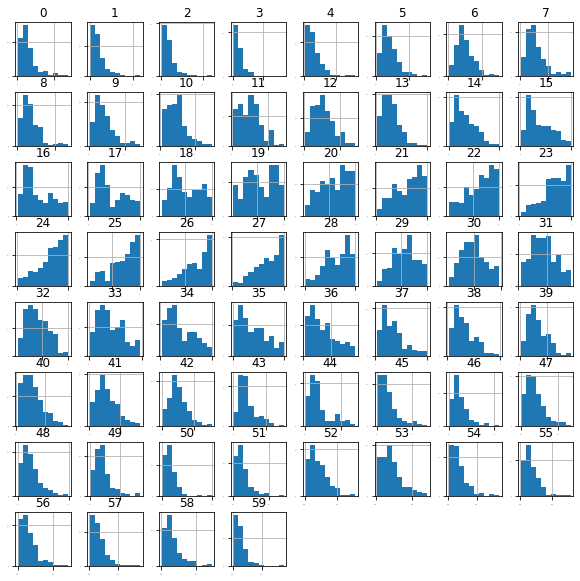

In [31]:
# histograms

df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, layout=(8,8), figsize=(10,10))
plt.show()

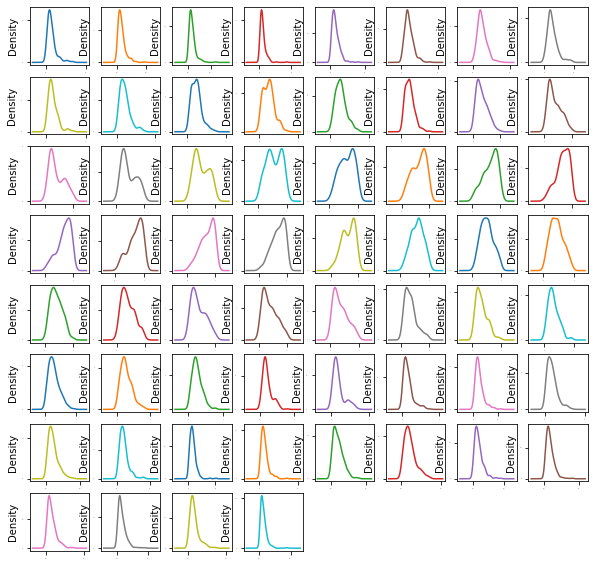

In [32]:
# density

df.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,
fontsize=1, figsize=(10,10))
plt.show()

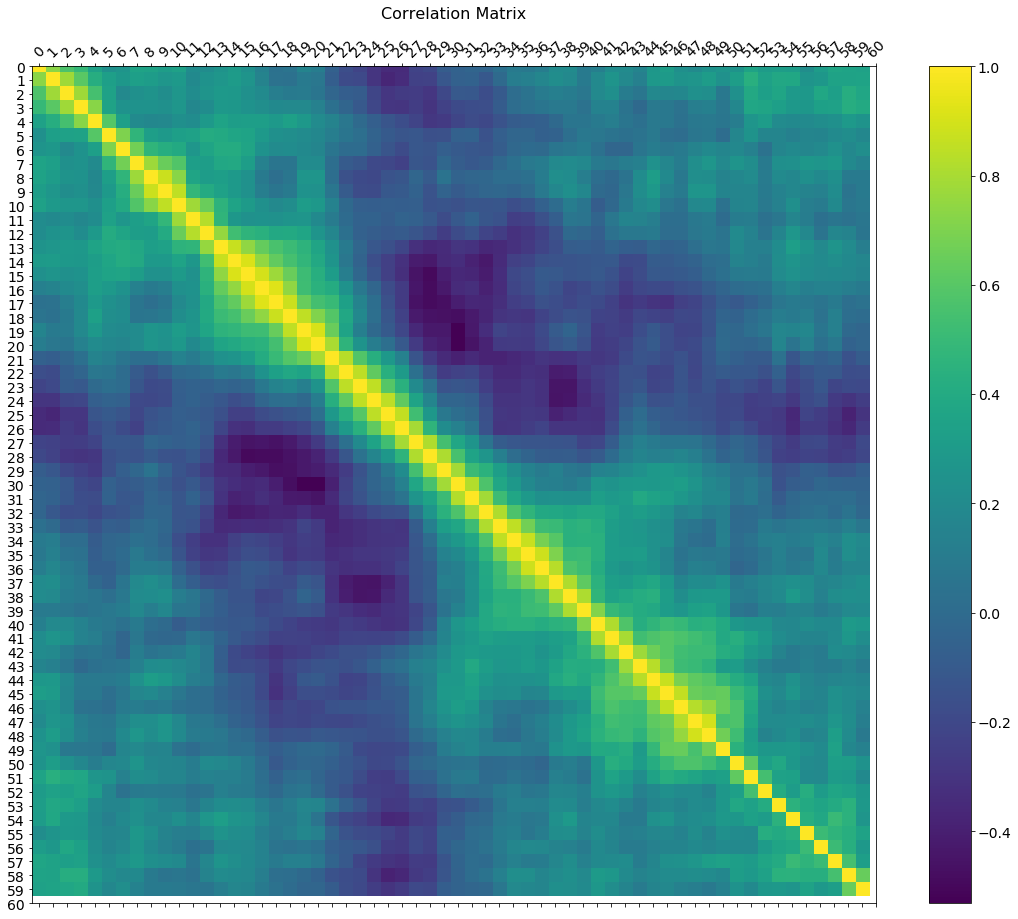

In [38]:
# correlation matrix

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [0]:
# Split-out validation dataset

array = df.values
X = array[:,0:60].astype(float)
y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y,
test_size=validation_size, random_state=seed)

In [0]:
# Test options and evaluation metric

num_folds = 10
seed = 7
scoring = 'accuracy'

In [43]:
# Spot-Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))

results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())


LR 0.7694852941176471 0.10051029509664779
LDA 0.7463235294117647 0.11785367885381073
KNN 0.8080882352941176 0.06750704820308338
CART 0.7220588235294118 0.12645348721591565
NB 0.6488970588235294 0.1418684214516758
SVM 0.7764705882352941 0.09041128152498236


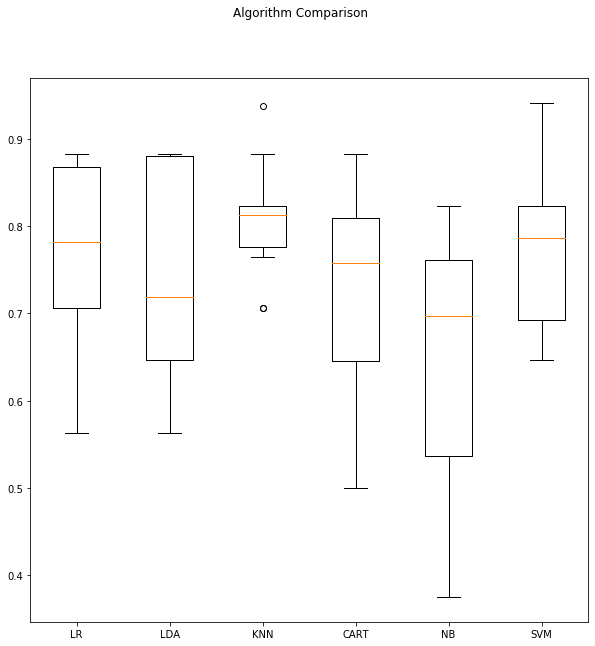

In [45]:
# Compare Algorithms

fig = plt.figure(figsize=(10,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [53]:
# Standardize the dataset

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(solver='lbfgs'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())


ScaledLR 0.7404411764705883 0.09466751140841813
ScaledLDA 0.7463235294117647 0.11785367885381073
ScaledKNN 0.8257352941176471 0.054511038214266574
ScaledCART 0.7286764705882354 0.06986841933778982
ScaledNB 0.6488970588235294 0.1418684214516758
ScaledSVM 0.8363970588235293 0.08869747214968386


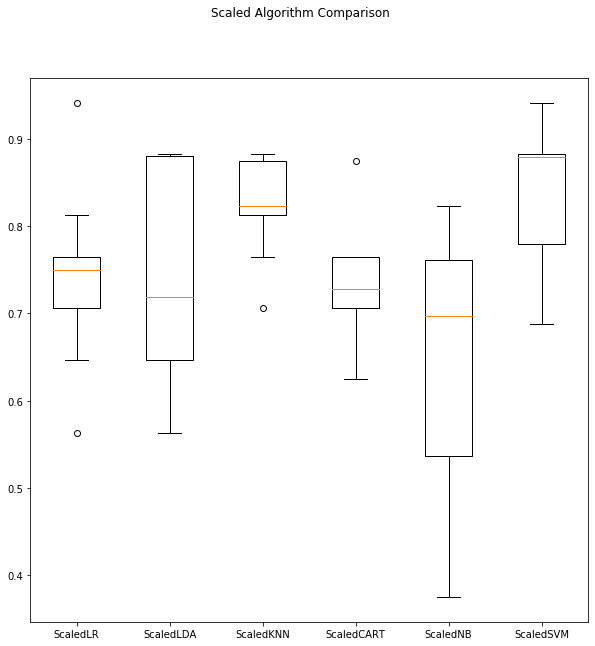

In [55]:
# Compare Algorithms

fig = plt.figure(figsize=(10,10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [57]:
# Tune scaled KNN

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, iid=False)
grid_result = grid.fit(rescaledX, y_train)

print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("{} ({}) with: {}".format(mean, stdev, param))

Best: 0.85 using {'n_neighbors': 1}
0.85 (0.05968577609876672) with: {'n_neighbors': 1}
0.8371323529411765 (0.06601389343386418) with: {'n_neighbors': 3}
0.8375 (0.03737725007982011) with: {'n_neighbors': 5}
0.7639705882352941 (0.0893737825672642) with: {'n_neighbors': 7}
0.7514705882352941 (0.08705087404087493) with: {'n_neighbors': 9}
0.7334558823529411 (0.104830998652816) with: {'n_neighbors': 11}
0.7330882352941176 (0.10580573208090603) with: {'n_neighbors': 13}
0.7279411764705882 (0.07614821756326462) with: {'n_neighbors': 15}
0.7099264705882353 (0.07928656388570995) with: {'n_neighbors': 17}
0.7220588235294118 (0.08508785913176035) with: {'n_neighbors': 19}
0.7102941176470587 (0.10950452661639593) with: {'n_neighbors': 21}


In [60]:
# Tune scaled SVM

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma='scale')
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold, iid=False)
grid_result = grid.fit(rescaledX, y_train)

print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
  print("{} ({}) with: {}".format(mean, stdev, param))

Best: 0.8724264705882353 using {'C': 2.0, 'kernel': 'rbf'}
0.7584558823529413 (0.09948301158200631) with: {'C': 0.1, 'kernel': 'linear'}
0.5352941176470589 (0.11422173467112237) with: {'C': 0.1, 'kernel': 'poly'}
0.5731617647058824 (0.1309303654500583) with: {'C': 0.1, 'kernel': 'rbf'}
0.7040441176470589 (0.06693297175243644) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.7463235294117647 (0.10950699524194979) with: {'C': 0.3, 'kernel': 'linear'}
0.6426470588235295 (0.13218739646981145) with: {'C': 0.3, 'kernel': 'poly'}
0.7658088235294118 (0.09169164818973898) with: {'C': 0.3, 'kernel': 'rbf'}
0.7349264705882353 (0.054566800193808336) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.7400735294117646 (0.08263557723261496) with: {'C': 0.5, 'kernel': 'linear'}
0.6621323529411764 (0.10566831409559928) with: {'C': 0.5, 'kernel': 'poly'}
0.788235294117647 (0.06418995518008062) with: {'C': 0.5, 'kernel': 'rbf'}
0.7466911764705882 (0.05874190108352445) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.7466911764705882

In [63]:
# ensembles

ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=1000)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=1000)))
results = []
names = []

for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name, cv_results.mean(), cv_results.std())

AB 0.8198529411764707 0.05829264110434879
GBM 0.8477941176470587 0.10687342544217408
RF 0.8367647058823529 0.06679045240804984
ET 0.8720588235294118 0.08941914153005674


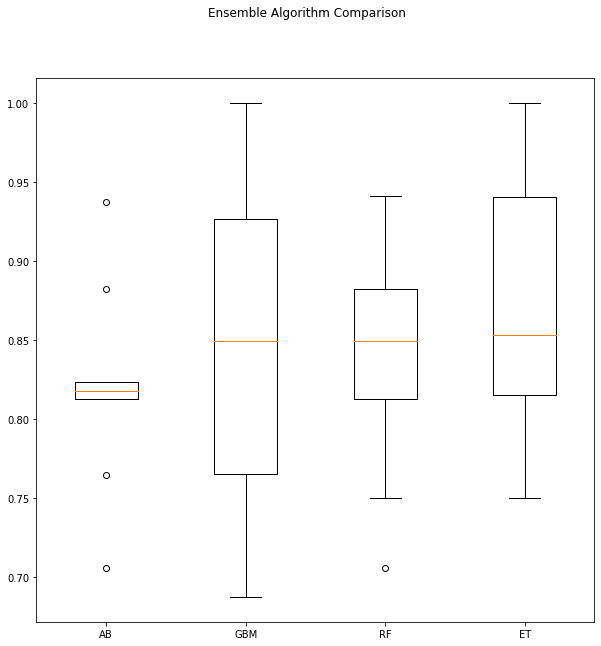

In [64]:
# Compare Algorithms

fig = plt.figure(figsize=(10,10))
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [66]:
# prepare the model

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, y_train)

# estimate accuracy on validation dataset

rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))

0.8571428571428571


In [67]:
print(confusion_matrix(y_validation, predictions))

[[23  4]
 [ 2 13]]


In [68]:
print(classification_report(y_validation, predictions))

              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42

